### Portfolio of Oil Exploration Assets: Learning Options, Sequential Drilling Options and Defer Options 
####  Marco Antonio Guimarães Dias, 
#### Luigi de Magalhães Detomi Calvette
##### RO Congress - Boston 2017


[Paper](http://www.realoptions.org/openconf2017/data/papers/57.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

In [126]:
###Dados de Entrada###
r=np.log(1+0.03)
#print(r)
delta=np.log(1+0.038)
sigma=0.3
tau=3
Po=50
rho=0.5


In [196]:
#Importar Case 2 ou ABC ou ABCD como case 
case=pd.read_csv("Case_Guy_DogFish.csv", sep=';')
case.set_index('Type', inplace=True)
case=case.astype(float).T
case

Type,DogFish
CF,0.30
I_w,80.00
q,0.15
B,450.00
Owner,1.00


In [197]:
def sinal(rho):
    CF_s=case.iloc[0,0] +(1-case.iloc[0,0])*rho
    CF_ins=case.iloc[0,0]*(1-rho)
    return CF_ins,CF_s


In [316]:
def carteira(case,P):
    #VPL=P*case.iloc[2,0]*case.iloc[3,0] - (case.iloc[3,0]*5.35 + 650)*P/50
    VPL=P*case.iloc[2,0]*case.iloc[3,0] - (case.iloc[3,0]*5.35 + 650)
    #c=0.047*P+3
    #VPL=P*case.iloc[2,0]*case.iloc[3,0] - (case.iloc[3,0]*c + 650)
    
    vme=case.iloc[0,0]*VPL - case.iloc[1,0]
    vme=np.maximum(0,vme)
    ### retorna   VME, Valor, Investimento, (valor - FC*Id), Id+Iw
    return vme, case.iloc[0,0]*VPL, case.iloc[1,0], case.iloc[0,0]*P*case.iloc[2,0]*case.iloc[3,0],case.iloc[0,0]*(case.iloc[3,0]*5.35 + 650)*P/50 +case.iloc[1,0] 

In [317]:
carteira(case,50)

(15.25, 95.25, 80.0, 1012.5, 997.25)

In [318]:
0.047*50 +3

5.35

In [319]:
sinal(rho)[0]

0.15

In [320]:
##################################################3
#####################################################
###########Solucao e_ DF ##############


In [322]:
def diffinexpcart(case,P,r,div,sigma,tau,accur):
    #############################################################
    #######Método por diferenças finitas explícitas##############
    #accur=0.05  #Porcentagem de acurácia
    
    #####Solução por diferenças finita explícitas###
    #Precisão em e intervalo da célula em V
    deltaP=P*accur
    
    # M são as divisões do grid em V
    #Perpetuidade vcritico não esta na programacao
    #M= int(1.1*vcritico(I,r,div,sigma,tau)[2]/deltaV) # Max é 10% acima do gatilho em perpetuidade. Vcrit- com gati precisa de tau
    Pmax=2*P
    M=int(Pmax/deltaP)
    PGrid=int(P/deltaP) #Ponto do grid onde esta P_0. 
    
    #deltat= (deltaP**2)/((sigma**2)*((3*I)**2)) #Convergência: Critério do peso central >=0. Pmax=3I ><1.1Gatilho_perp
    deltat= (deltaP**2)/((sigma**2)*(Pmax**2))
    N= int(tau/deltat) +1
    
    df=1/(1+(r*deltat)) # fator de desconto
    
    
    #Vetor Pt
    Pt=np.zeros(M+1)
    Gatilho=np.zeros((N+1))
    F=np.zeros((N+1,M+1))
    deltat=tau/N
    for i in range(M+1):
        Pt[i]= i*deltaP
        F[N,i]=carteira(case,Pt[i])[0] 
        Gatilho[N]=carteira(case,Pt[i])[2]
        #Gatilho[N]=I
    
    
    ##############Loop################
    for j in range(N-1,-1,-1): #de N-1 até zero(-1) pulando em -1
        for i in range(1,M,1): # de 1 até M-1 pulando em 1
            pu= 0.5*((sigma**2)*(i**2) + ((r - div)*i))*deltat
            pm = 1 - (sigma**2)*(i**2)*deltat
            pdown = 0.5*((sigma**2)*(i**2) - ((r - div)*i))*deltat
            F[j,i]= df*(pu*F[j+1,i+1] + pm*F[j+1,i] + pdown*F[j+1,i - 1])
            
            ###Vetor Gatilho####
            if F[j,i]<carteira(case,Pt[i])[0]  and F[j,i-1]>carteira(case,Pt[i-1])[0] :
                Gatilho[j]=Pt[i]
            
           
        
        F[j,0]=0
        solution=carteira(case,Pt[i])
        F[j,M]=carteira(case,Pt[i])[0]
        
    T=np.linspace(0,tau,num=N+1)
    return[F[0,PGrid],PGrid,F,T,Pt,Gatilho]



In [323]:
accur=0.005

In [324]:
start=time.time()
opcao,PGrid,mapa,tempo,preco,gatilho=diffinexpcart(case,50,r,delta,sigma,3,accur)
cpu=time.time()-start
print('minutos-',cpu/60)


minutos- 38.66690903902054


gatilho é: 88.75
opcao vale: 187.403459911749


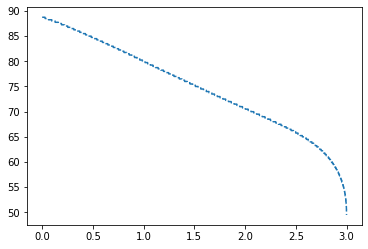

In [340]:
print('gatilho é:',gatilho[0])
print('opcao vale:', opcao)
plt.plot(tempo[:-1],gatilho[:-1], ls='--')


In [326]:
venc=[]
for p in preco:
    venc.append(carteira(case,p)[0])

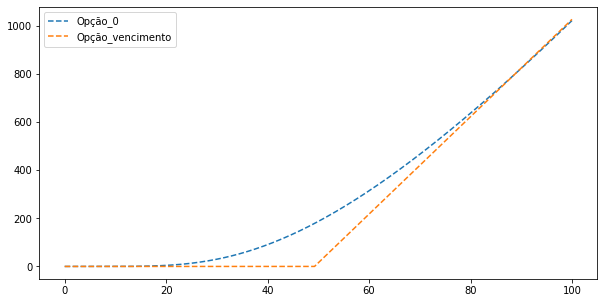

In [327]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(preco,mapa[0,:], ls='--')

#ax.plot(preco,venc, ls='--')
ax.plot(preco,mapa[-1,:], ls='--')

plt.legend(['Opção_0','Opção_vencimento'])
#ax.set_ylim(-5,120)
#ax.set_xlim(-5,120)



In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

In [251]:
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [259]:
#####Valor Beta e Valor Crítico####
def vcritico(I,r,div,sigma,tau):
    if tau <=0:
        vcrit=I
        beta= 0.5 -(r-div)/(sigma**2) + np.sqrt(np.power(((r-div)/(sigma**2)) - 0.5,2) +((2*r)/(sigma**2)))
    else:
        if div<=0:
            print("Faça um BSM")
        else:
            
            beta= 0.5 -(r-div)/(sigma**2) + np.sqrt(np.power(((r-div)/sigma**2) -0.5,2) +((2*r)/(sigma**2)))
            V_perp= I*(beta/(beta-1))
            V_0=np.maximum(I, (r/div)*I)
            ht= -1*((r-div)*tau + 2*sigma*np.sqrt(tau))*(V_0/(V_perp - V_0))
            vcrit= V_0 + (V_perp - V_0)*(1- np.exp(ht))
    return[beta,vcrit, V_perp]
            
        
        

In [260]:
####Método Black Merton e Scholes
def bsm(V,I,r,div,sigma,tau):
    #Opção de Compra Europeia com dividendos - Merton
    

    if tau <=0:
        call=np.maximum(V-I,0)
        put=np.maximum(I-V,0)
    else:
        h1=(np.log(V/I) + ((r-div) +(0.5*np.power(sigma,2)))*tau)/(sigma*np.sqrt(tau))
        h2=h1 -sigma*np.sqrt(tau)
        
        call= V*np.exp(-div*tau)*norm.cdf(h1) -I*np.exp(-r*tau)*norm.cdf(h2)
        put= call + (np.exp(-r*tau)*I - V*np.exp(-div*tau))
        put2= I*np.exp(-r*tau)*(1- norm.cdf(h2)) - V*np.exp(-div*tau)*(1-norm.cdf(h1))
    #return[call, put, norm.cdf(h1), norm.cdf(h2),put2]
    return[call, put]





In [261]:
###Função probabilidade para cálculo do gatilho pelo método de aproximação analítica
def prob(V,tau,gama,h,vcrit,r,div,sigma):
    ####Função probabilidade
    lamba=(-r +(gama*(r-div)) +0.5*gama*(gama-1)*sigma**2)*tau
    dist= -(np.log(V/h)+((r-div)+(gama - 0.5)*sigma**2)*tau)/(sigma*np.sqrt(tau))
    kappa= (2*gama -1) +  2*(r-div)/(sigma**2)
    prob=np.exp(lamba)*(V**gama)*(norm.cdf(dist) - ((vcrit/V)**kappa)*(norm.cdf(dist -(2*np.log(vcrit/V))/(sigma*np.sqrt(tau)))))
    
    return[prob]
    

In [262]:
### Método Bjerksund e Stensland (1993) - saida - Derivativo, Gatilho e V_0
def bjst(V,I,r,div,sigma,tau):
    #### Call americana
    if div <=0: #igual a call europeia
        bs=bsm(V,I,r,div,sigma,tau)[0]
    else:
        beta=vcritico(I,r,div,sigma,tau)[0]
        vcrit=vcritico(I,r,div,sigma,tau)[1]
        alpha= (vcrit - I)*vcrit**(-beta)
        
        if V>= vcrit:
            bs=V-I
        else:
            bs= alpha*V**beta -alpha*prob(V,tau,beta,vcrit,vcrit,r,div,sigma)[0]+prob(V,tau,1,vcrit,vcrit,r,div,sigma)[0]-prob(V,tau,1,I,vcrit,r,div,sigma)[0]-I*prob(V,tau,0,vcrit,vcrit,r,div,sigma)[0]+I*prob(V,tau,0,I,vcrit,r,div,sigma)[0]
    
    return[bs, vcrit, V]
    
    

In [263]:
##vme
carteira(case,50)[0]

15.25

In [328]:
# bjst(V,I,r,div,sigma,tau):
#valor da opção
bjst(carteira(case,50)[1],carteira(case,50)[2],r,delta,sigma,3)[0]

23.950981055273914

In [333]:
# bjst(V,I,r,div,sigma,tau):
#valor da opção
bjst(carteira(case,50)[1],carteira(case,50)[2],r,delta,sigma,3)[0]

23.950981055273914

In [334]:
bjst(carteira(case,50)[3],carteira(case,50)[4],r,delta,sigma,3)

[189.41005837993202, 1760.734204420066, 1012.5]

In [335]:
vcritico(carteira(case,50)[4],r,delta,sigma,3)[1]/(case.iloc[0,0]*case.iloc[2,0]*case.iloc[3,0])

86.94983725531189

In [336]:
opcao

187.403459911749

In [338]:
gatilho[0]

88.75

In [309]:
case

Type,DogFish
CF,0.30
I_w,80.00
q,0.15
B,450.00
Owner,1.00
